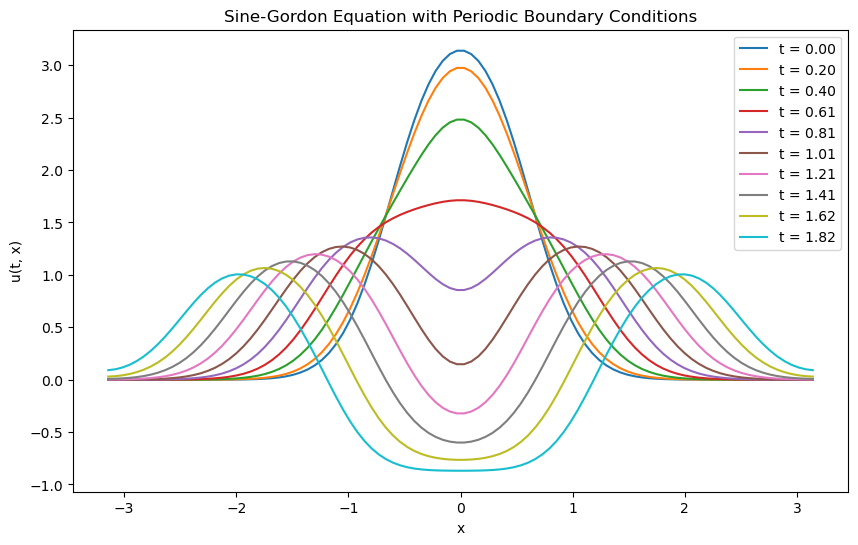

In [1]:
#from ChatGPT

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Sine-Gordon equation with periodic boundary conditions
def sine_gordon(t, u, L):
    N = len(u) // 2
    x_vals = np.linspace(-L, L, N)
    dx = x_vals[1] - x_vals[0]
    
    # Extract u and its time derivative from the input vector
    u_vals = u[:N]
    u_t_vals = u[N:]
    
    # Compute the second spatial derivative using finite differences
    u_xx = np.roll(u_vals, -1) - 2 * u_vals + np.roll(u_vals, 1)
    u_xx /= dx ** 2
    
    # Compute the time derivatives using the Sine-Gordon equation
    du_dt = u_t_vals
    du_t_dt = u_xx - np.sin(u_vals)
    
    return np.concatenate([du_dt, du_t_dt])

# Initial condition
L = np.pi  # Length of the spatial domain
N = 100  # Number of spatial points
sigma = 0.5  # Parameter for initial condition
x_vals = np.linspace(-L, L, N)
initial_u = 4 * np.arctan(np.exp(-x_vals ** 2 / (2 * sigma ** 2)))
initial_u_t = np.zeros_like(initial_u)

# Time span
T = 2  # Final time
t_vals = np.linspace(0, T, 100)

# Solve the PDE using solve_ivp
sol = solve_ivp(sine_gordon, [0, T], np.concatenate([initial_u, initial_u_t]), t_eval=t_vals, args=(L,), method='RK45')

# Extract the solution
u_vals_solution = sol.y[:N, :]

# Plot the solution
plt.figure(figsize=(10, 6))
for i in range(0, len(t_vals), 10):
    plt.plot(x_vals, u_vals_solution[:, i], label=f't = {t_vals[i]:.2f}')

plt.title('Sine-Gordon Equation with Periodic Boundary Conditions')
plt.xlabel('x')
plt.ylabel('u(t, x)')
plt.legend()
plt.show()
